# Cardiac arrythmia EDA


In [112]:
import numpy as np
import pandas as pd 


In [113]:
#Load data
df = pd.read_csv('data_arrhythmia.csv', delimiter=';',na_values = ['?']) 
df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


Sex repartition:
 1    249
0    203
Name: sex, dtype: int64


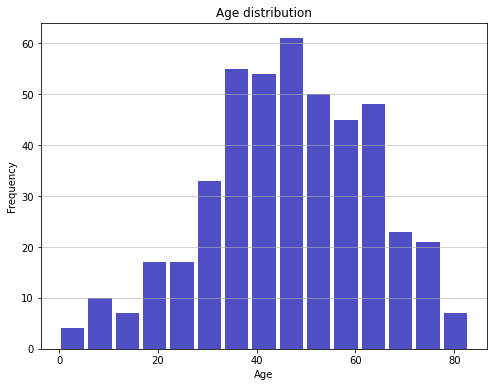

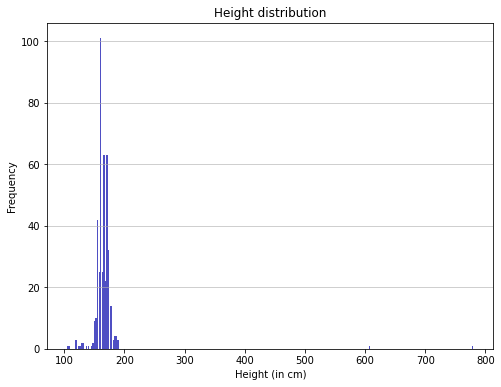

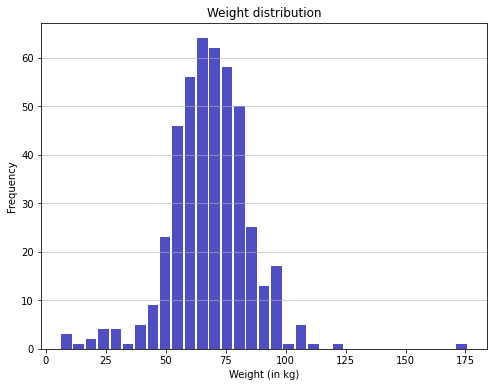

In [114]:
import matplotlib.pyplot as plt

#Sex distribution
print("Sex repartition:\n",df.sex.value_counts())

#Age distribution
plt.figure(figsize =(8,6))
n, bins, patches = plt.hist(x=df.age, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution') 
plt.show()

#Height distribution
plt.figure(figsize =(8,6))
n, bins, patches = plt.hist(x=df.height, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Height (in cm)')
plt.ylabel('Frequency')
plt.title('Height distribution') 
plt.show()

#Weight distribution
plt.figure(figsize =(8,6))
n, bins, patches = plt.hist(x=df.weight, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Weight (in kg)')
plt.ylabel('Frequency')
plt.title('Weight distribution') 
plt.show() 




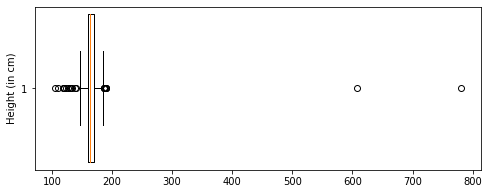

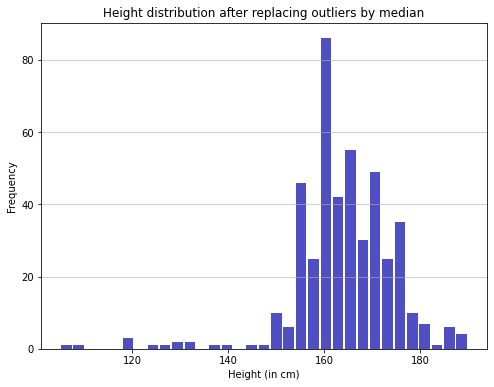

In [115]:
#Dealing with outliers
plt.figure(figsize =(8,3))
plt.boxplot(df.height, widths = 3, vert=False) 
plt.ylabel('Height (in cm)')  
plt.show() 

from scipy import stats
z=np.abs(stats.zscore(df.height)) 
median = df['height'].median()
df['height'] = np.where(z> 3, median,df['height'])

#Height distribution
plt.figure(figsize =(8,6))
n, bins, patches = plt.hist(x=df.height, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Height (in cm)')
plt.ylabel('Frequency')
plt.title('Height distribution after replacing outliers by median') 
plt.show()

In [116]:
#Percentage of missing values 
missing_cols = df.columns[df.isnull().any()]
print("Columns with missing values and percentage:")
 
for i in range(len(missing_cols)): 
        p = 100*(df[missing_cols[i]].isnull().sum()/len(df))
        print(missing_cols[i], "  ",np.around(p,2),"%")

 

Columns with missing values and percentage:
T    1.77 %
P    4.87 %
QRST    0.22 %
J    83.19 %
heart_rate    0.22 %


In [117]:
#Handling missing values
df = df.drop(['J'], axis=1) #drop column J 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

from sklearn.impute import KNNImputer 
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns) #KNN imputation for the remaining missing values
#df.isna().any().sum()

In [118]:
#Dropping columns with one distinct value
print("Columns with one distinct value")
for col in df.columns: 
    if len(df[col].value_counts()) == 1:
        print(df[col].value_counts())
        df = df.drop(col, axis=1)

Columns with one distinct value
0.0    452
Name: S'_wave, dtype: int64
0.0    452
Name: CB, dtype: int64
0.0    452
Name: CD, dtype: int64
0.0    452
Name: CS, dtype: int64
0.0    452
Name: EV, dtype: int64
0.0    452
Name: EY, dtype: int64
0.0    452
Name: FF, dtype: int64
0.0    452
Name: FH, dtype: int64
0.0    452
Name: FJ, dtype: int64
0.0    452
Name: FL, dtype: int64
0.0    452
Name: FS, dtype: int64
0.0    452
Name: FZ, dtype: int64
0.0    452
Name: GA, dtype: int64
0.0    452
Name: GH, dtype: int64
0.0    452
Name: IB, dtype: int64
0.0    452
Name: KP, dtype: int64
0.0    452
Name: LC, dtype: int64


In [119]:
df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KV,KY,KZ,LA,LB,LD,LE,LF,LG,diagnosis
0,0.903614,0.0,1.000000,0.435294,0.270677,0.368321,0.501805,0.241758,0.590244,0.457478,...,0.638554,1.0,0.381356,0.968531,0.0,0.53125,0.741667,0.507519,0.569579,0.466667
1,0.674699,1.0,0.705882,0.341176,0.195489,0.332061,0.610108,0.150183,0.190244,0.577713,...,0.614458,1.0,0.360169,1.000000,0.0,0.31250,0.675000,0.485714,0.500971,0.333333
2,0.650602,0.0,0.788235,0.523529,0.624060,0.311069,0.555957,0.282051,0.497561,0.785924,...,0.783133,1.0,0.402542,0.916084,0.0,0.34375,0.783333,0.424812,0.566990,0.600000
3,0.662651,0.0,0.823529,0.517647,0.338346,0.385496,0.534296,0.260073,0.697561,0.586510,...,0.686747,1.0,0.516949,0.923077,0.0,0.37500,0.716667,0.592481,0.648544,0.000000
4,0.903614,0.0,1.000000,0.435294,0.248120,0.345420,0.462094,0.252747,0.502439,0.457478,...,0.626506,1.0,0.555085,0.874126,0.0,0.21875,0.825000,0.523308,0.656311,0.400000
